# Multi-layer Perceptron
![iamge](sigmoid.png)

In [1]:
import numpy as np

In [2]:
def sigmoid(sum):
    return 1 / (1+np.exp(-sum))

In [6]:
sigmoid(1)

0.7310585786300049

# Input layer to Hidden layer
![image](input_to_hidden.png)

In [7]:
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
inputs.shape

(4, 2)

In [26]:
outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])
outputs.shape

(4, 1)

In [13]:
weights0 = np.array([[-0.424, -0.740, -0.961],
                     [0.358, -0.577, -0.469]])
weights0.shape

(2, 3)

In [14]:
weights1 = np.array([[-0.017],
                     [-0.893],
                     [0.148]])
weights1.shape

(3, 1)

In [15]:
epochs = 100
learning_rate = .3

In [18]:
input_layer = inputs
sum_synapse0 = np.dot(input_layer,weights0)
hidden_layer = sigmoid(sum_synapse0)
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [21]:
sum_synapse1 = np.dot(hidden_layer, weights1)
output_layer = sigmoid(sum_synapse1)
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

![image](loss_function.png)

In [32]:
error_output_layer = outputs-output_layer
np.mean(abs(error_output_layer))

0.49880848923713045

![image](derivative.png)

In [33]:
def sigmoid_derivative(y):
    return y*(1-y)

![image](delta.png)

In [37]:
derivative_output = sigmoid_derivative(output_layer)
delta_output = error_output_layer*derivative_output
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

![image](delta_hidden.png)

In [41]:
derivative_hidden = sigmoid_derivative(hidden_layer)
delta_hidden = delta_output.dot(weights1.T)*derivative_hidden
delta_hidden

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

![image](weight_update1.png)

In [50]:
delta_output.T.shape,hidden_layer.shape

((1, 4), (4, 3))

In [53]:
weights1 = weights1 + np.dot(hidden_layer.T,delta_output)*learning_rate

In [54]:
weights1

array([[-0.00711903],
       [-0.88642447],
       [ 0.15432644]])

![image](weight_update2.png)

In [60]:
hidden_layer.shape,delta_hidden.shape,inputs.shape,weights0.shape

((4, 3), (4, 3), (4, 2), (2, 3))

In [61]:
weights0 = weights0 + np.dot(inputs.T, delta_hidden)*learning_rate

In [62]:
weights0

array([[-0.42402414, -0.74304038, -0.96055542],
       [ 0.35797265, -0.58052365, -0.46832134]])

# Complete Neural Network

In [117]:
import numpy as np

def sigmoid(sum):
    return 1 / (1 + np.exp(-sum))

def sigmoid_derivative(sigmoid):
    return sigmoid * (1 - sigmoid)

def sigmoid_derivative(y):
    return y*(1-y)

inputs = np.array([[0,0], 
                   [0,1], 
                   [1,0], 
                   [1,1]])

outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])
# weights0 = np.array([[-0.424, -0.740, -0.961],
#                     [0.358, -0.577, -0.469]])

# weights1 = np.array([[-0.017],
#                     [-0.893],
#                     [0.148]])
weights0 = 2 * np.random.random((2, 3)) - 1
weights1 = 2 * np.random.random((3, 1)) - 1

In [118]:
epochs = 1000
learning_rate = .01
error = []

for epoch in range(epochs):
    input_layer = inputs
    sum_synapse0 = np.dot(input_layer,weights0)
    hidden_layer = sigmoid(sum_synapse0)
    
    sum_synapse1 = np.dot(hidden_layer, weights1)
    output_layer = sigmoid(sum_synapse1)
    
    error_output_layer = outputs-output_layer
    average = np.mean(abs(error_output_layer))
    print("Epochs: "+ str(epoch+1)+" Error: "+ str(average))
    error.append(average)
    
    derivative_output = sigmoid_derivative(output_layer)
    delta_output = error_output_layer*derivative_output
    
    derivative_hidden = sigmoid_derivative(hidden_layer)
    delta_hidden = delta_output.dot(weights1.T)*derivative_hidden
    
    weights1 = weights1 + np.dot(hidden_layer.T,delta_output)*learning_rate
    
    weights0 = weights0 + np.dot(inputs.T, delta_hidden)*learning_rate

Epochs: 1 Error: 0.4995399471181135
Epochs: 2 Error: 0.4995246028381406
Epochs: 3 Error: 0.49950904510096983
Epochs: 4 Error: 0.49949322434634913
Epochs: 5 Error: 0.4994771096266304
Epochs: 6 Error: 0.4994606839297306
Epochs: 7 Error: 0.4994439405242882
Epochs: 8 Error: 0.4994268801255698
Epochs: 9 Error: 0.4994095087142316
Epochs: 10 Error: 0.49939183587033675
Epochs: 11 Error: 0.49937387351132256
Epochs: 12 Error: 0.49935563494478796
Epochs: 13 Error: 0.4993371341653163
Epochs: 14 Error: 0.49931838533948925
Epochs: 15 Error: 0.499299402435276
Epochs: 16 Error: 0.4992801989615844
Epochs: 17 Error: 0.49926078779136346
Epochs: 18 Error: 0.49924118104764187
Epochs: 19 Error: 0.4992213900365813
Epochs: 20 Error: 0.49920142521530014
Epochs: 21 Error: 0.49918129618507195
Epochs: 22 Error: 0.49916101170273186
Epochs: 23 Error: 0.49914057970483516
Epochs: 24 Error: 0.4991200073404426
Epochs: 25 Error: 0.4990993010094336
Epochs: 26 Error: 0.49907846640403253
Epochs: 27 Error: 0.499057508551838

Epochs: 710 Error: 0.37861954909162165
Epochs: 711 Error: 0.3784532452133723
Epochs: 712 Error: 0.3782873208176604
Epochs: 713 Error: 0.37812177462755336
Epochs: 714 Error: 0.3779566053700143
Epochs: 715 Error: 0.3777918117758948
Epochs: 716 Error: 0.37762739257992506
Epochs: 717 Error: 0.3774633465207039
Epochs: 718 Error: 0.3772996723406874
Epochs: 719 Error: 0.37713636878617707
Epochs: 720 Error: 0.37697343460730637
Epochs: 721 Error: 0.37681086855802665
Epochs: 722 Error: 0.37664866939609265
Epochs: 723 Error: 0.376486835883046
Epochs: 724 Error: 0.37632536678419903
Epochs: 725 Error: 0.3761642608686171
Epochs: 726 Error: 0.37600351690910033
Epochs: 727 Error: 0.37584313368216443
Epochs: 728 Error: 0.3756831099680209
Epochs: 729 Error: 0.3755234445505565
Epochs: 730 Error: 0.3753641362173116
Epochs: 731 Error: 0.3752051837594589
Epochs: 732 Error: 0.37504658597177976
Epochs: 733 Error: 0.37488834165264173
Epochs: 734 Error: 0.37473044960397406
Epochs: 735 Error: 0.37457290863124326

Epochs: 1434 Error: 0.30390179686023044
Epochs: 1435 Error: 0.3038259410678824
Epochs: 1436 Error: 0.30375013044690624
Epochs: 1437 Error: 0.3036743649334469
Epochs: 1438 Error: 0.3035986444638071
Epochs: 1439 Error: 0.3035229689744475
Epochs: 1440 Error: 0.3034473384019876
Epochs: 1441 Error: 0.3033717526832046
Epochs: 1442 Error: 0.3032962117550346
Epochs: 1443 Error: 0.30322071555457186
Epochs: 1444 Error: 0.3031452640190696
Epochs: 1445 Error: 0.3030698570859395
Epochs: 1446 Error: 0.30299449469275125
Epochs: 1447 Error: 0.3029191767772343
Epochs: 1448 Error: 0.3028439032772754
Epochs: 1449 Error: 0.3027686741309209
Epochs: 1450 Error: 0.3026934892763753
Epochs: 1451 Error: 0.30261834865200177
Epochs: 1452 Error: 0.30254325219632167
Epochs: 1453 Error: 0.3024681998480153
Epochs: 1454 Error: 0.3023931915459206
Epochs: 1455 Error: 0.3023182272290346
Epochs: 1456 Error: 0.3022433068365116
Epochs: 1457 Error: 0.3021684303076645
Epochs: 1458 Error: 0.3020935975819643
Epochs: 1459 Error:

Epochs: 2165 Error: 0.2577434876936493
Epochs: 2166 Error: 0.2576905304245548
Epochs: 2167 Error: 0.2576375960740168
Epochs: 2168 Error: 0.25758468462717216
Epochs: 2169 Error: 0.25753179606917526
Epochs: 2170 Error: 0.25747893038519865
Epochs: 2171 Error: 0.25742608756043145
Epochs: 2172 Error: 0.2573732675800815
Epochs: 2173 Error: 0.2573204704293725
Epochs: 2174 Error: 0.2572676960935475
Epochs: 2175 Error: 0.2572149445578654
Epochs: 2176 Error: 0.2571622158076032
Epochs: 2177 Error: 0.2571095098280549
Epochs: 2178 Error: 0.2570568266045316
Epochs: 2179 Error: 0.25700416612236254
Epochs: 2180 Error: 0.2569515283668927
Epochs: 2181 Error: 0.2568989133234851
Epochs: 2182 Error: 0.2568463209775198
Epochs: 2183 Error: 0.256793751314394
Epochs: 2184 Error: 0.2567412043195213
Epochs: 2185 Error: 0.2566886799783327
Epochs: 2186 Error: 0.2566361782762765
Epochs: 2187 Error: 0.25658369919881685
Epochs: 2188 Error: 0.2565312427314354
Epochs: 2189 Error: 0.25647880885963126
Epochs: 2190 Error:

Epochs: 2896 Error: 0.22433931707438504
Epochs: 2897 Error: 0.2242999558629477
Epochs: 2898 Error: 0.22426060972847678
Epochs: 2899 Error: 0.2242212786630183
Epochs: 2900 Error: 0.22418196265862378
Epochs: 2901 Error: 0.2241426617073496
Epochs: 2902 Error: 0.22410337580125722
Epochs: 2903 Error: 0.22406410493241458
Epochs: 2904 Error: 0.22402484909289394
Epochs: 2905 Error: 0.2239856082747725
Epochs: 2906 Error: 0.22394638247013432
Epochs: 2907 Error: 0.22390717167106758
Epochs: 2908 Error: 0.22386797586966595
Epochs: 2909 Error: 0.22382879505802833
Epochs: 2910 Error: 0.22378962922825907
Epochs: 2911 Error: 0.2237504783724686
Epochs: 2912 Error: 0.22371134248277097
Epochs: 2913 Error: 0.22367222155128666
Epochs: 2914 Error: 0.2236331155701411
Epochs: 2915 Error: 0.22359402453146526
Epochs: 2916 Error: 0.2235549484273949
Epochs: 2917 Error: 0.22351588725007135
Epochs: 2918 Error: 0.22347684099164095
Epochs: 2919 Error: 0.22343780964425575
Epochs: 2920 Error: 0.22339879320007272
Epochs:

Epochs: 3647 Error: 0.19852736787152614
Epochs: 3648 Error: 0.19849740878080135
Epochs: 3649 Error: 0.19846746001219173
Epochs: 3650 Error: 0.19843752156069955
Epochs: 3651 Error: 0.19840759342132966
Epochs: 3652 Error: 0.19837767558909056
Epochs: 3653 Error: 0.1983477680589928
Epochs: 3654 Error: 0.19831787082605024
Epochs: 3655 Error: 0.19828798388528032
Epochs: 3656 Error: 0.19825810723170226
Epochs: 3657 Error: 0.19822824086033897
Epochs: 3658 Error: 0.19819838476621637
Epochs: 3659 Error: 0.19816853894436204
Epochs: 3660 Error: 0.19813870338980827
Epochs: 3661 Error: 0.1981088780975891
Epochs: 3662 Error: 0.1980790630627419
Epochs: 3663 Error: 0.198049258280306
Epochs: 3664 Error: 0.19801946374532584
Epochs: 3665 Error: 0.19798967945284657
Epochs: 3666 Error: 0.19795990539791708
Epochs: 3667 Error: 0.19793014157558947
Epochs: 3668 Error: 0.1979003879809178
Epochs: 3669 Error: 0.19787064460896
Epochs: 3670 Error: 0.19784091145477645
Epochs: 3671 Error: 0.19781118851343107
Epochs: 3

Epochs: 4385 Error: 0.17892392635427126
Epochs: 4386 Error: 0.17890039966448268
Epochs: 4387 Error: 0.17887688029059814
Epochs: 4388 Error: 0.17885336822933529
Epochs: 4389 Error: 0.17882986347741237
Epochs: 4390 Error: 0.1788063660315518
Epochs: 4391 Error: 0.17878287588847508
Epochs: 4392 Error: 0.17875939304490757
Epochs: 4393 Error: 0.17873591749757542
Epochs: 4394 Error: 0.17871244924320698
Epochs: 4395 Error: 0.17868898827853213
Epochs: 4396 Error: 0.17866553460028306
Epochs: 4397 Error: 0.17864208820519306
Epochs: 4398 Error: 0.17861864908999808
Epochs: 4399 Error: 0.1785952172514351
Epochs: 4400 Error: 0.17857179268624307
Epochs: 4401 Error: 0.17854837539116358
Epochs: 4402 Error: 0.17852496536293838
Epochs: 4403 Error: 0.17850156259831293
Epochs: 4404 Error: 0.17847816709403289
Epochs: 4405 Error: 0.17845477884684635
Epochs: 4406 Error: 0.17843139785350337
Epochs: 4407 Error: 0.178408024110756
Epochs: 4408 Error: 0.1783846576153575
Epochs: 4409 Error: 0.17836129836406295
Epoch

Epochs: 5137 Error: 0.1630879108742732
Epochs: 5138 Error: 0.16306907347687483
Epochs: 5139 Error: 0.16305024136890628
Epochs: 5140 Error: 0.16303141454817827
Epochs: 5141 Error: 0.16301259301250184
Epochs: 5142 Error: 0.16299377675969046
Epochs: 5143 Error: 0.16297496578755666
Epochs: 5144 Error: 0.16295616009391653
Epochs: 5145 Error: 0.16293735967658557
Epochs: 5146 Error: 0.16291856453338133
Epochs: 5147 Error: 0.16289977466212174
Epochs: 5148 Error: 0.16288099006062712
Epochs: 5149 Error: 0.16286221072671694
Epochs: 5150 Error: 0.1628434366582137
Epochs: 5151 Error: 0.16282466785294064
Epochs: 5152 Error: 0.16280590430872086
Epochs: 5153 Error: 0.16278714602338018
Epochs: 5154 Error: 0.1627683929947449
Epochs: 5155 Error: 0.16274964522064225
Epochs: 5156 Error: 0.162730902698901
Epochs: 5157 Error: 0.162712165427351
Epochs: 5158 Error: 0.16269343340382275
Epochs: 5159 Error: 0.1626747066261482
Epochs: 5160 Error: 0.16265598509216123
Epochs: 5161 Error: 0.16263726879969503
Epochs: 

Epochs: 5856 Error: 0.15078567346475924
Epochs: 5857 Error: 0.1507701375679641
Epochs: 5858 Error: 0.15075460564340085
Epochs: 5859 Error: 0.1507390776895497
Epochs: 5860 Error: 0.15072355370488952
Epochs: 5861 Error: 0.15070803368790076
Epochs: 5862 Error: 0.15069251763706568
Epochs: 5863 Error: 0.15067700555086633
Epochs: 5864 Error: 0.15066149742778545
Epochs: 5865 Error: 0.1506459932663068
Epochs: 5866 Error: 0.15063049306491427
Epochs: 5867 Error: 0.15061499682209356
Epochs: 5868 Error: 0.15059950453633064
Epochs: 5869 Error: 0.1505840162061114
Epochs: 5870 Error: 0.1505685318299242
Epochs: 5871 Error: 0.15055305140625652
Epochs: 5872 Error: 0.1505375749335973
Epochs: 5873 Error: 0.15052210241043648
Epochs: 5874 Error: 0.15050663383526425
Epochs: 5875 Error: 0.15049116920657113
Epochs: 5876 Error: 0.15047570852284994
Epochs: 5877 Error: 0.1504602517825923
Epochs: 5878 Error: 0.15044479898429258
Epochs: 5879 Error: 0.15042935012644348
Epochs: 5880 Error: 0.1504139052075405
Epochs: 

Epochs: 6569 Error: 0.1406327210544514
Epochs: 6570 Error: 0.14061967203223463
Epochs: 6571 Error: 0.1406066260641588
Epochs: 6572 Error: 0.1405935831491404
Epochs: 6573 Error: 0.1405805432860966
Epochs: 6574 Error: 0.14056750647394528
Epochs: 6575 Error: 0.14055447271160437
Epochs: 6576 Error: 0.1405414419979928
Epochs: 6577 Error: 0.1405284143320303
Epochs: 6578 Error: 0.14051538971263616
Epochs: 6579 Error: 0.14050236813873032
Epochs: 6580 Error: 0.1404893496092343
Epochs: 6581 Error: 0.1404763341230686
Epochs: 6582 Error: 0.1404633216791556
Epochs: 6583 Error: 0.14045031227641674
Epochs: 6584 Error: 0.14043730591377573
Epochs: 6585 Error: 0.14042430259015504
Epochs: 6586 Error: 0.14041130230447857
Epochs: 6587 Error: 0.1403983050556708
Epochs: 6588 Error: 0.14038531084265632
Epochs: 6589 Error: 0.14037231966435998
Epochs: 6590 Error: 0.14035933151970836
Epochs: 6591 Error: 0.14034634640762633
Epochs: 6592 Error: 0.14033336432704174
Epochs: 6593 Error: 0.14032038527688126
Epochs: 65

Epochs: 7282 Error: 0.1320437690026563
Epochs: 7283 Error: 0.13203264993997074
Epochs: 7284 Error: 0.13202153327082491
Epochs: 7285 Error: 0.13201041899443122
Epochs: 7286 Error: 0.13199930711000113
Epochs: 7287 Error: 0.1319881976167472
Epochs: 7288 Error: 0.13197709051388284
Epochs: 7289 Error: 0.13196598580062074
Epochs: 7290 Error: 0.13195488347617476
Epochs: 7291 Error: 0.13194378353975852
Epochs: 7292 Error: 0.13193268599058622
Epochs: 7293 Error: 0.1319215908278723
Epochs: 7294 Error: 0.13191049805083194
Epochs: 7295 Error: 0.1318994076586803
Epochs: 7296 Error: 0.1318883196506329
Epochs: 7297 Error: 0.13187723402590593
Epochs: 7298 Error: 0.13186615078371486
Epochs: 7299 Error: 0.13185506992327686
Epochs: 7300 Error: 0.1318439914438086
Epochs: 7301 Error: 0.1318329153445278
Epochs: 7302 Error: 0.13182184162465177
Epochs: 7303 Error: 0.13181077028339794
Epochs: 7304 Error: 0.1317997013199853
Epochs: 7305 Error: 0.13178863473363178
Epochs: 7306 Error: 0.1317775705235573
Epochs: 7

Epochs: 7977 Error: 0.12485240703032324
Epochs: 7978 Error: 0.12484277876698438
Epochs: 7979 Error: 0.12483315242247756
Epochs: 7980 Error: 0.12482352799621452
Epochs: 7981 Error: 0.12481390548760507
Epochs: 7982 Error: 0.12480428489606117
Epochs: 7983 Error: 0.12479466622099433
Epochs: 7984 Error: 0.12478504946181576
Epochs: 7985 Error: 0.1247754346179375
Epochs: 7986 Error: 0.12476582168877173
Epochs: 7987 Error: 0.12475621067373074
Epochs: 7988 Error: 0.12474660157222689
Epochs: 7989 Error: 0.12473699438367311
Epochs: 7990 Error: 0.12472738910748347
Epochs: 7991 Error: 0.12471778574306976
Epochs: 7992 Error: 0.12470818428984655
Epochs: 7993 Error: 0.12469858474722692
Epochs: 7994 Error: 0.12468898711462575
Epochs: 7995 Error: 0.12467939139145678
Epochs: 7996 Error: 0.12466979757713456
Epochs: 7997 Error: 0.12466020567107369
Epochs: 7998 Error: 0.12465061567268934
Epochs: 7999 Error: 0.12464102758139653
Epochs: 8000 Error: 0.124631441396611
Epochs: 8001 Error: 0.12462185711774826
Epo

Epochs: 8609 Error: 0.11912675666479786
Epochs: 8610 Error: 0.11911823287494458
Epochs: 8611 Error: 0.11910971067457632
Epochs: 8612 Error: 0.119101190063235
Epochs: 8613 Error: 0.1190926710404608
Epochs: 8614 Error: 0.11908415360579477
Epochs: 8615 Error: 0.119075637758778
Epochs: 8616 Error: 0.11906712349895271
Epochs: 8617 Error: 0.11905861082585932
Epochs: 8618 Error: 0.11905009973904059
Epochs: 8619 Error: 0.11904159023803755
Epochs: 8620 Error: 0.11903308232239271
Epochs: 8621 Error: 0.11902457599164831
Epochs: 8622 Error: 0.11901607124534691
Epochs: 8623 Error: 0.11900756808303098
Epochs: 8624 Error: 0.11899906650424312
Epochs: 8625 Error: 0.11899056650852669
Epochs: 8626 Error: 0.11898206809542433
Epochs: 8627 Error: 0.11897357126447958
Epochs: 8628 Error: 0.1189650760152361
Epochs: 8629 Error: 0.11895658234723747
Epochs: 8630 Error: 0.11894809026002724
Epochs: 8631 Error: 0.11893959975315002
Epochs: 8632 Error: 0.11893111082614918
Epochs: 8633 Error: 0.11892262347856974
Epochs

Epochs: 9293 Error: 0.1136448711469705
Epochs: 9294 Error: 0.11363733592786363
Epochs: 9295 Error: 0.11362980202117758
Epochs: 9296 Error: 0.11362226942655687
Epochs: 9297 Error: 0.1136147381436449
Epochs: 9298 Error: 0.11360720817208657
Epochs: 9299 Error: 0.11359967951152558
Epochs: 9300 Error: 0.11359215216160681
Epochs: 9301 Error: 0.1135846261219749
Epochs: 9302 Error: 0.11357710139227403
Epochs: 9303 Error: 0.11356957797214959
Epochs: 9304 Error: 0.11356205586124654
Epochs: 9305 Error: 0.11355453505920994
Epochs: 9306 Error: 0.11354701556568456
Epochs: 9307 Error: 0.1135394973803168
Epochs: 9308 Error: 0.11353198050275115
Epochs: 9309 Error: 0.11352446493263381
Epochs: 9310 Error: 0.11351695066961036
Epochs: 9311 Error: 0.11350943771332667
Epochs: 9312 Error: 0.11350192606342882
Epochs: 9313 Error: 0.11349441571956256
Epochs: 9314 Error: 0.11348690668137469
Epochs: 9315 Error: 0.1134793989485115
Epochs: 9316 Error: 0.11347189252061918
Epochs: 9317 Error: 0.11346438739734462
Epoch

Epochs: 9923 Error: 0.10914374494060614
Epochs: 9924 Error: 0.1091369709912765
Epochs: 9925 Error: 0.10913019815336805
Epochs: 9926 Error: 0.10912342642659525
Epochs: 9927 Error: 0.10911665581067358
Epochs: 9928 Error: 0.10910988630531772
Epochs: 9929 Error: 0.10910311791024335
Epochs: 9930 Error: 0.10909635062516487
Epochs: 9931 Error: 0.10908958444979802
Epochs: 9932 Error: 0.10908281938385836
Epochs: 9933 Error: 0.10907605542706153
Epochs: 9934 Error: 0.10906929257912225
Epochs: 9935 Error: 0.10906253083975721
Epochs: 9936 Error: 0.10905577020868133
Epochs: 9937 Error: 0.10904901068561144
Epochs: 9938 Error: 0.10904225227026315
Epochs: 9939 Error: 0.10903549496235243
Epochs: 9940 Error: 0.10902873876159558
Epochs: 9941 Error: 0.10902198366770854
Epochs: 9942 Error: 0.1090152296804085
Epochs: 9943 Error: 0.10900847679941122
Epochs: 9944 Error: 0.10900172502443346
Epochs: 9945 Error: 0.10899497435519187
Epochs: 9946 Error: 0.10898822479140341
Epochs: 9947 Error: 0.108981476332785
Epoc

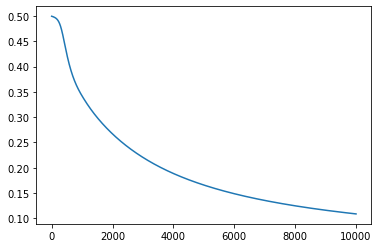

In [119]:
import matplotlib.pyplot as plt
plt.plot(error)

In [120]:
output_layer

array([[0.01004067],
       [0.8752589 ],
       [0.87525492],
       [0.17497468]])

In [121]:
weights0, weights1

(array([[-6.39255918,  0.99093011,  7.186739  ],
        [-6.35146205,  0.9908025 ,  7.17148856]]),
 array([[ -4.77979024],
        [-23.54096557],
        [ 19.13852509]]))

In [122]:
def calculate_output(instance):
    hidden_layer = sigmoid(np.dot(instance, weights0))
    output_layer = sigmoid(np.dot(hidden_layer, weights1))
    return round(output_layer[0])

In [123]:
calculate_output([1,1])

0